# Data visualization

Note: The plotting functions outlined in this notebook show the **general** procedures used for visualizing the data. The methods used to select the data for plotting would have to be altered slightly if different visualizations are desired. E.g. the  function for visualizing the M matrix based on the release year attribute splits the data into 4 chunks, each (approximately) spanning a timerange of 20 years. If instead we wanted to group the data into chunks spanning 10 years, the methods used to select the relevant data would need to be adjusted. For the sake of brevity, we have not included the plotting set-up for each and every plot explored. However, the procedures presented in this notebook demonstrate how we created the plots presented in the report, and it is straightforward to adjust them for different plotting set-ups.

In [1]:
import numpy as np
import pandas as pd

import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['text.antialiased'] = True
plt.rcParams.update({'font.size': 18})

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Input the path to MovieLens 1M datasets below
path = 'input_path'

usr_dat = f'{path}users.dat'
mov_dat = f'{path}movies.dat'
rat_dat = f'{path}ratings.dat'

df_usr = pd.read_csv(usr_dat, names=['user_id','gender','age','occ','zip'], sep='::', engine='python')
df_rat = pd.read_csv(rat_dat, names=['user_id','movie_id','rating','timestamp'], sep='::', engine='python')
df_mov = pd.read_csv(mov_dat, names=['movie_id','title','genre'], encoding='latin-1', sep='::', engine='python')

In [3]:
# Input the path to the U and M matrices saved from the Matrix Factorization below
path = 'input_path'
U = np.load(f'{path}U.npy')
M = np.load(f'{path}M.npy')

In [4]:
# There are movie IDs in the movie dataset that are completely missing --> must remove
N = np.max(df_rat.movie_id)
unique_ids = np.unique(df_rat.movie_id)
missing_ids = []

# Find missing IDs
for ID in range(1, N+1):
    if len(unique_ids[unique_ids == ID]) == 0:
        missing_ids.append(ID)

# Remove from dataframe 
for ID in np.asarray(missing_ids) :
    df_mov = df_mov.drop(df_mov[df_mov.movie_id == ID].index)

In [5]:
def reduce_dimensionality(matrix):
    """
    Function to perform the fitting for each dimensionality reduction technique.
    
    Input:
        - The matrix to be fitted (i.e. the training data).
        
    Returns:
        - The transformed values for each technique (UMAP, t-SNE, PCA).
        
    """
    umap_fit = umap.UMAP(random_state=44).fit(matrix)
    tsne_fit = TSNE(n_components=2).fit_transform(matrix)
    pca_fit  = PCA(n_components=2, svd_solver='full').fit_transform(matrix) 
    
    return umap_fit, tsne_fit, pca_fit

In [6]:
# Generate the transformed values for the U and M matrices
umap_U, tsne_U, pca_U = reduce_dimensionality(U)
umap_M, tsne_M, pca_M = reduce_dimensionality(M.T)

# Plotting procedures

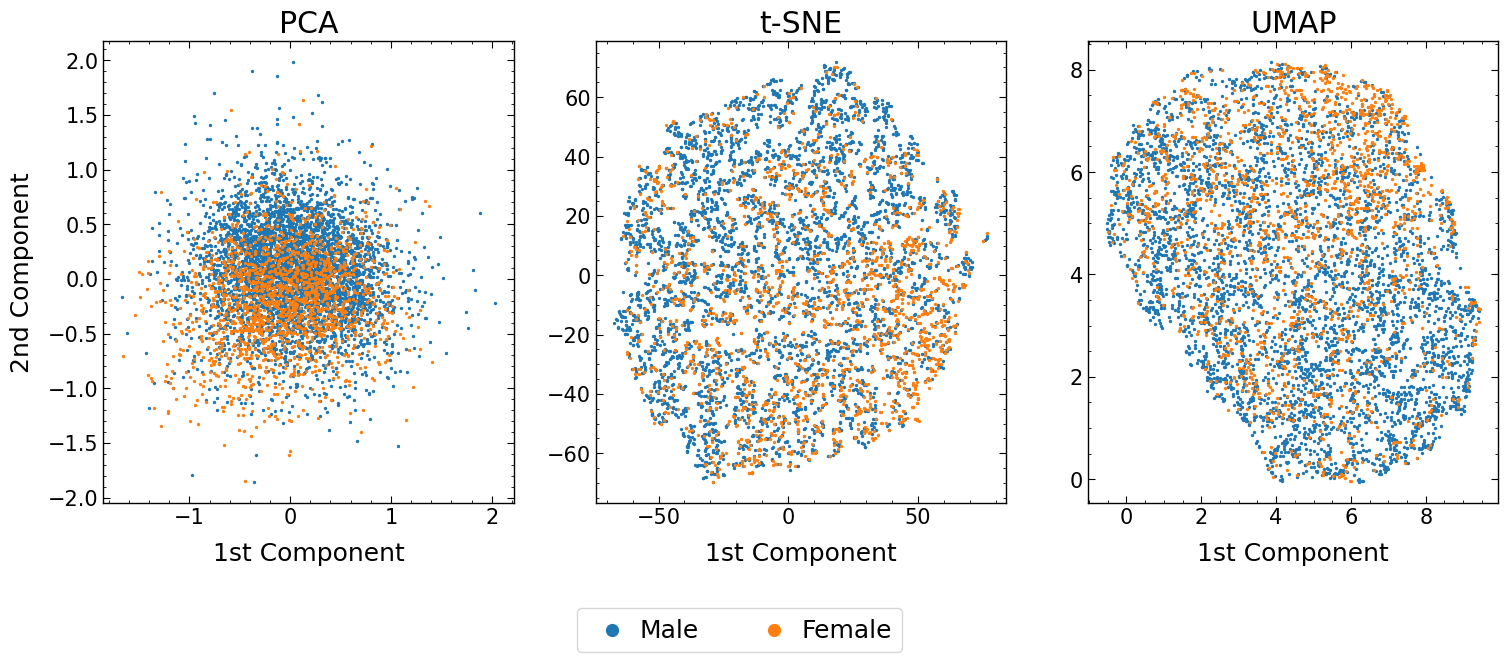

In [7]:
def gender():
    """
    Plotting fucntion to visualize the underlying patterns in the U matrix based on the GENDER attribute.
    
    """
    gen = np.asarray(df_usr.gender)
    m = np.where(gen=='M')[0]
    f = np.where(gen=='F')[0]
    
    labels = ['Male', 'Female']
    fig, axs = plt.subplots(1, 3, figsize=[18,6])
    
    for i, gender in enumerate([m, f]):
        axs[0].scatter(pca_U[gender, 0],  pca_U[gender, 1],  s=2)
        axs[1].scatter(tsne_U[gender, 0], tsne_U[gender, 1], s=2, label=labels[i])
        axs[2].scatter(umap_U.embedding_[gender, 0], umap_U.embedding_[gender, 1], s=2)
    
    axs[0].set_title('PCA')
    axs[1].set_title('t-SNE')
    axs[2].set_title('UMAP')
    axs[0].set_ylabel('2nd Component', labelpad=10)
    axs[1].legend(fontsize=18, markerscale=6, handletextpad=0.1, loc='lower center', bbox_to_anchor=(0.35,-0.35), ncol=2)
    
    for ax in axs.ravel():
        ax.minorticks_on()
        ax.set_xlabel('1st Component', labelpad=10)
        ax.tick_params(which='minor', direction='in', length=2.5)
        ax.tick_params(which='both',  direction='in', top=True, right=True)
        ax.tick_params(which='major', direction='in', length=5, labelsize=15)
     
    plt.show()
    
    
gender()    

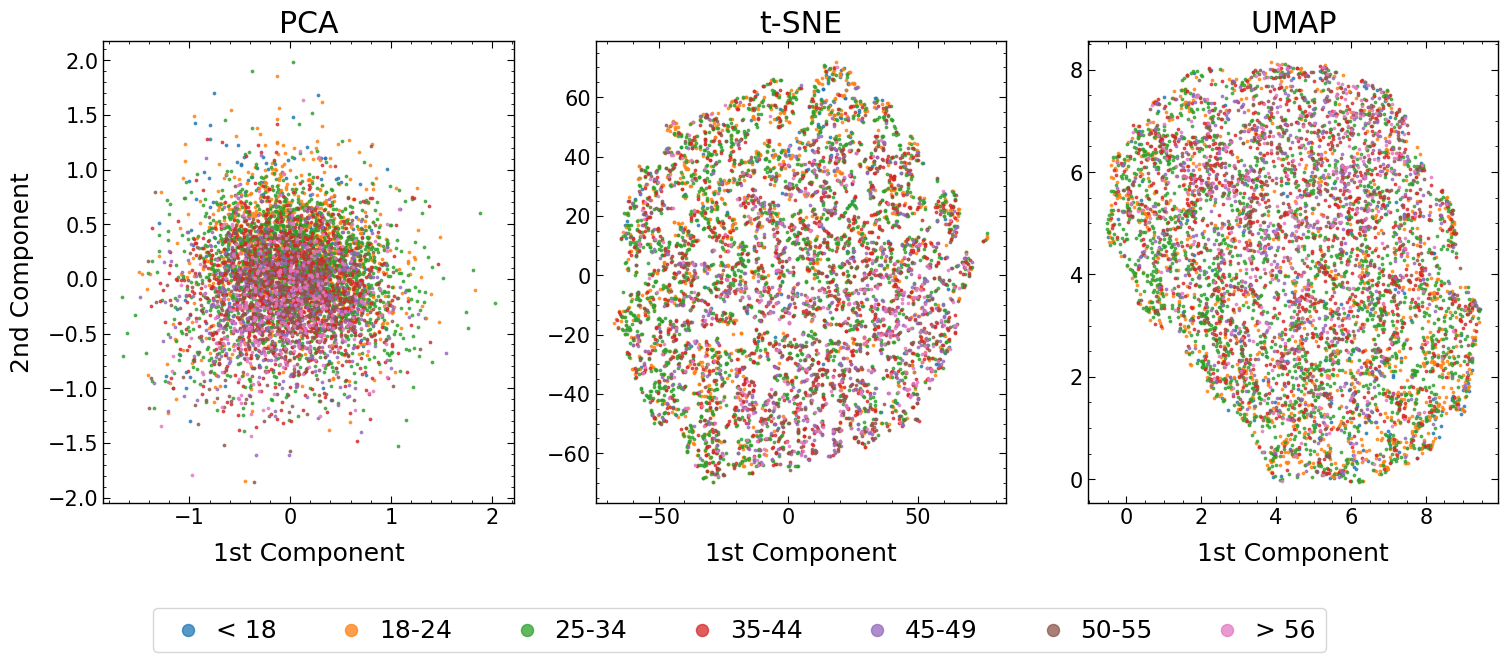

In [8]:
def age():
    """
    Plotting fucntion to visualize the underlying patterns in the U matrix based on the AGE attribute.
    
    """
    ages = np.unique(df_usr.age) # Grouping by age
    labels = ['< 18', '18-24', '25-34', '35-44', '45-49', '50-55', '> 56']
    
    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=[18,6])

    for age, label in zip(ages, labels):
        idx = np.where(df_usr.age==age)[0]  #locate indices for age
        axs[0].scatter(pca_U[idx,0],  pca_U[idx,1],  s=3, alpha=0.75, label=label)
        axs[1].scatter(tsne_U[idx,0], tsne_U[idx,1], s=3, alpha=0.75, label=label)
        axs[2].scatter(umap_U.embedding_[idx,0], umap_U.embedding_[idx,1], s=3, alpha=0.75, label=label)

    axs[0].set_title('PCA')
    axs[1].set_title('t-SNE')
    axs[2].set_title('UMAP')
    axs[0].set_ylabel('2nd Component', labelpad=10)
    axs[1].legend(fontsize=18, markerscale=5, handletextpad=0.1, loc='lower center', bbox_to_anchor=(0.35,-0.35), ncol=7)


    for ax in axs.ravel():
        ax.minorticks_on()
        ax.set_xlabel('1st Component', labelpad=10)
        ax.tick_params(which='minor', direction='in', length=2.5)
        ax.tick_params(which='both',  direction='in', top=True, right=True)
        ax.tick_params(which='major', direction='in', length=5, labelsize=15)
        
    plt.show()

    
age()

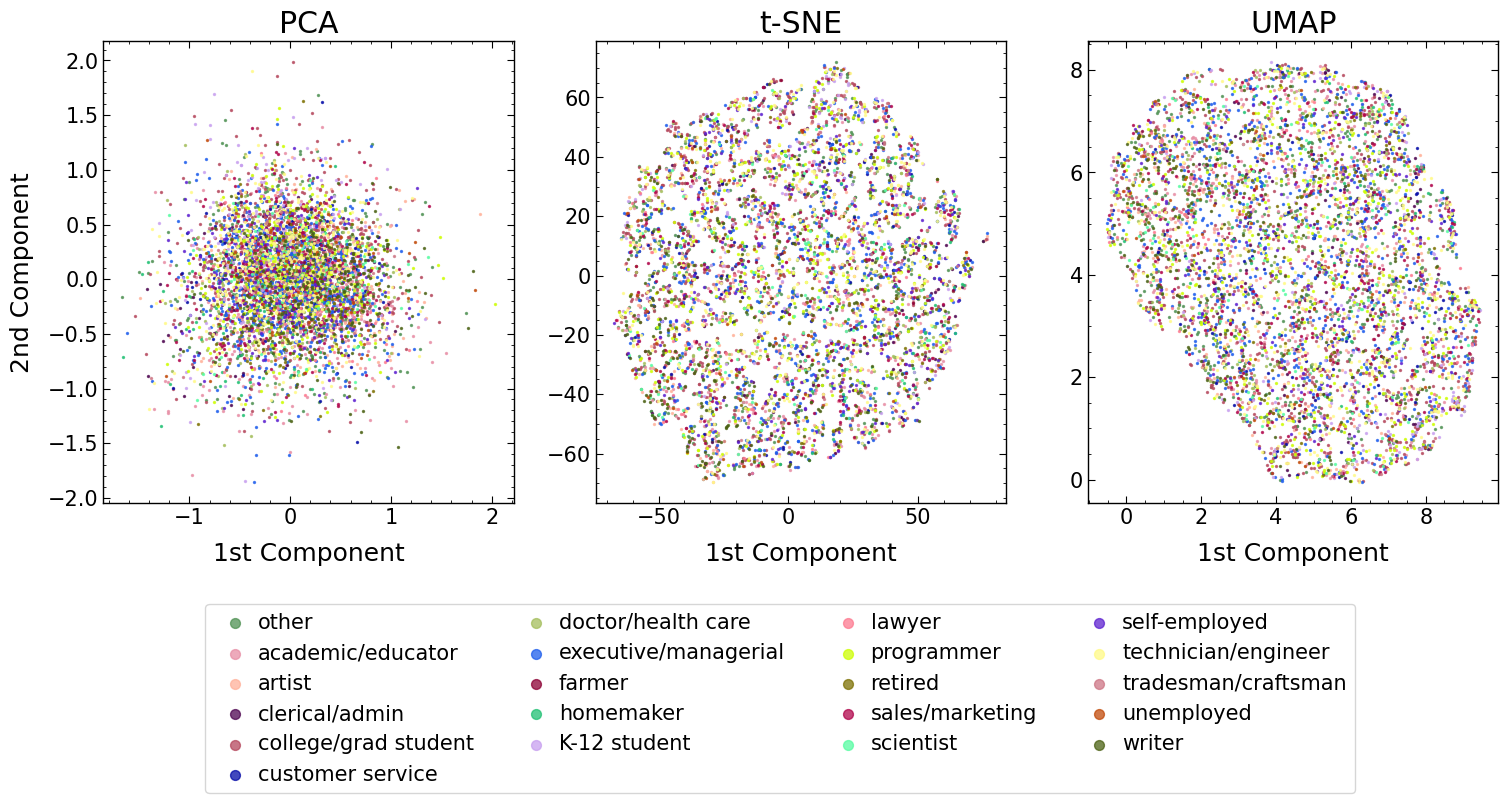

In [9]:
def occupation(seed):
    """
    Plotting fucntion to visualize the underlying patterns in the U matrix based on the OCCUPATION attribute.
    
    """
    np.random.seed(seed) # Will choose colors randomly
    color_dict = mcolors.XKCD_COLORS
    colors = list(color_dict.keys())
    
    occs = np.unique(df_usr.occ) # Grouping by occupation
    labels = ["other", "academic/educator", "artist", "clerical/admin", "college/grad student", "customer service", "doctor/health care", "executive/managerial", "farmer", "homemaker", "K-12 student", "lawyer", "programmer", "retired", "sales/marketing", "scientist", "self-employed", "technician/engineer", "tradesman/craftsman", "unemployed", "writer"]

    # Plotting -----
    fig, axs = plt.subplots(1, 3, figsize=[18,6])

    for occ, label in zip(occs, labels):
        idx = np.where(df_usr.occ==occ)[0] # Locate indices for the occupation
        color = np.random.choice(colors)   # Choosing colors
        colors.remove(color)
        axs[0].scatter(pca_U[idx,0],  pca_U[idx,1],  s=2, alpha=0.75, label=label, c=color)
        axs[1].scatter(tsne_U[idx,0], tsne_U[idx,1], s=2, alpha=0.75, label=label, c=color)
        axs[2].scatter(umap_U.embedding_[idx,0], umap_U.embedding_[idx,1], s=2, alpha=0.75, label=label, c=color)

    axs[0].set_title('PCA')
    axs[1].set_title('t-SNE')
    axs[2].set_title('UMAP')
    axs[0].set_ylabel('2nd Component', labelpad=10)
    axs[1].legend(fontsize=15, markerscale=5, handletextpad=0.1, loc='lower center', bbox_to_anchor=(0.45,-0.65), ncol=4)

    for ax in axs.ravel():
        ax.minorticks_on()
        ax.set_xlabel('1st Component', labelpad=10)
        ax.tick_params(which='minor', direction='in', length=2.5)
        ax.tick_params(which='both',  direction='in', top=True, right=True)
        ax.tick_params(which='major', direction='in', length=5, labelsize=15)


    plt.show()

    
occupation(seed=99)

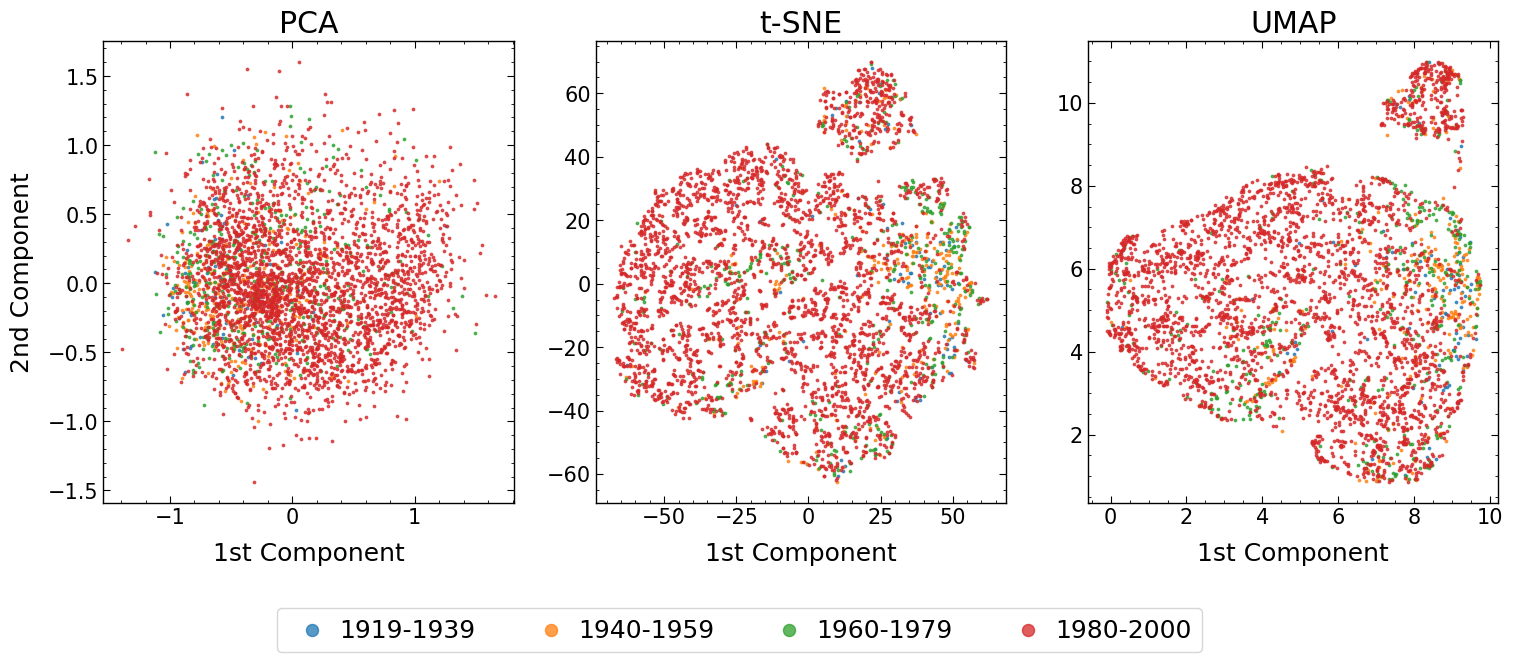

In [10]:
def year():
    """
    Plotting fucntion to visualize the underlying patterns in the M matrix based on the YEAR of release attribute.
    
    """

    # Years span 1919 - 2000: we will split the data into N year chunks
    years=[]
    for title in df_mov.title:
        years.append(int(title[-5:-1])) # Selecting the year

    N = 20 # timerange
    indices = []
    years = np.asarray(years)
    
    # Finding indices for each year range ---> this will have to be changed depending on the value of N
    yr = 1920
    terminate=False
    while terminate==False:
        idx = np.where((years >= yr) & (years < yr+N))[0]
        indices.append(idx)
        yr = yr + N
        if yr >= max(years):
            terminate=True

    # Need to add 1919 years to start and 2000 years to end
    indices[0]  = np.append(indices[0],  (np.where(years == 1919)[0]))
    indices[-1] = np.append(indices[-1], (np.where(years == 2000)[0]))


    # Plotting -----
    fig, axs = plt.subplots(1, 3, figsize=[18,6])
    labels = ['1919-1939', '1940-1959', '1960-1979', '1980-2000']
    
    for idx, label in zip(indices, labels):        
        axs[0].scatter(pca_M[idx, 0],  pca_M[idx, 1],  s=3, alpha=0.75)
        axs[1].scatter(tsne_M[idx, 0], tsne_M[idx, 1], s=3, alpha=0.75, label=label)
        axs[2].scatter(umap_M.embedding_[idx,0], umap_M.embedding_[idx,1], s=3, alpha=0.75)

    axs[0].set_title('PCA')
    axs[1].set_title('t-SNE')
    axs[2].set_title('UMAP')
    axs[0].set_ylabel('2nd Component', labelpad=10)
    axs[1].legend(fontsize=18, markerscale=5, handletextpad=0.1, loc='lower center', bbox_to_anchor=(0.35,-0.35), ncol=4)

    for ax in axs.ravel():
        ax.minorticks_on()
        ax.set_xlabel('1st Component', labelpad=10)
        ax.tick_params(which='minor', direction='in', length=2.5)
        ax.tick_params(which='both',  direction='in', top=True, right=True)
        ax.tick_params(which='major', direction='in', length=5, labelsize=15)

    plt.show()
    
    
year()

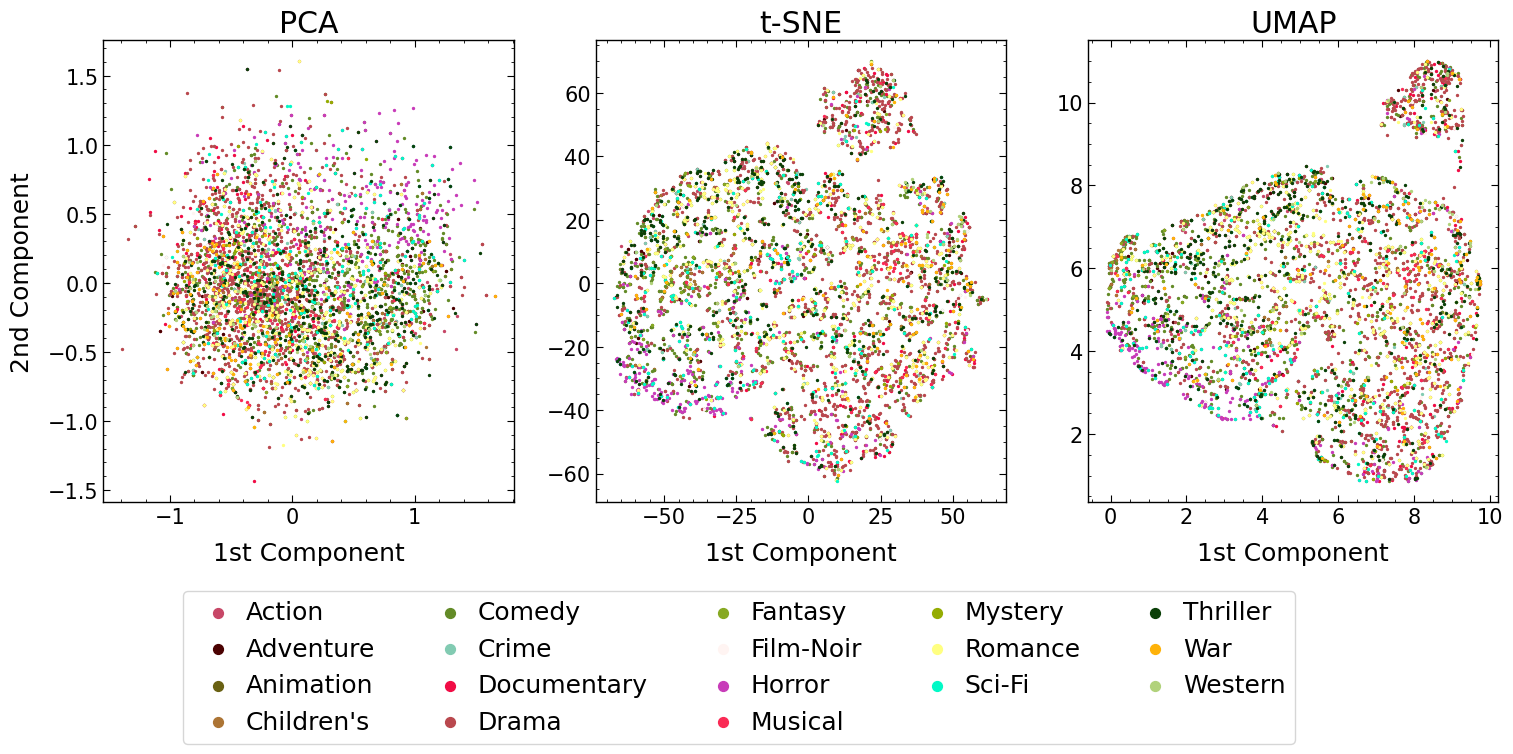

In [11]:
def genre(seed):
    """
    Plotting fucntion to visualize the underlying patterns in the M matrix based on the GENRE attribute.
    
    """
    np.random.seed(seed)
    color_dict = mcolors.XKCD_COLORS
    colors = list(color_dict.keys())
    
    labels = ["Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
    
    # Must separate genres that are mixed (i.e. some movies have multiple genres)
    genres = df_mov.genre.to_list()

    # X will be a list of tuples of indices and genres
    X = []
    for idx, genre in enumerate(genres):
        line = genre.split('|')
        for word in line:
            X.append([idx, word])

    # find indices for every genre  
    indices = []
    for genre in labels:
        Y = np.where(np.asarray(X)[:,1]==genre)[0] #indices of that genre in x array
        Z = np.asarray(X)[Y] # those elements in the X array
        indices.append(Z[0:,0].astype(int)) # the indices corresponding to the dataframe
        

    # Plotting  
    fig, axs = plt.subplots(1, 3, figsize=[18,6])
    
    for idx, label in zip(indices, labels):
        color = np.random.choice(colors)
        colors.remove(color)
        axs[0].scatter(pca_M[idx,0],  pca_M[idx,1],  s=2, label=label, c=color)
        axs[1].scatter(tsne_M[idx,0], tsne_M[idx,1], s=2, label=label, c=color)
        axs[2].scatter(umap_M.embedding_[idx,0], umap_M.embedding_[idx,1], s=2, label=label, c=color)

    axs[0].set_title('PCA')
    axs[1].set_title('t-SNE')
    axs[2].set_title('UMAP')
    axs[0].set_ylabel('2nd Component', labelpad=10)
    axs[1].legend(fontsize=18, markerscale=5, handletextpad=0.1, loc='lower center', bbox_to_anchor=(0.35,-0.55), ncol=5)

    for ax in axs.ravel():
        ax.minorticks_on()
        ax.set_xlabel('1st Component', labelpad=10)
        ax.tick_params(which='minor', direction='in', length=2.5)
        ax.tick_params(which='both',  direction='in', top=True, right=True)
        ax.tick_params(which='major', direction='in', length=5, labelsize=15)

    plt.show()


genre(seed=109)